In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [14]:
def gradient_regression(X, y, alpha, b, w):
    dw = 0.0; db = 0.0                
    for i in range(len(X)):         
        aux = -2.0*(y[i]-(w*X[i]+b))
        db = db + aux               # este solucionador puede desbordarse fácilmente
        dw = dw + X[i]*aux          # este solucionador puede desbordarse fácilmente
    aux = 1.0/float(len(X))
    b = b - aux*db*alpha
    w = w - aux*dw*alpha
    return b,w

In [21]:
def plot(fig, X, y, b, w, epochs):
    axs[fig].plot(X, y, 'yo', label = 'Muestras')
    X = np.array(X)
    axs[fig].plot(X,w*X+b, 'k-', label = 'Pérdida de regresión:'+'{:9.2f}'.format(loss(X,y,b,w)))
    axs[fig].set_xlabel('{:5.0f}'.format(epochs) + ' epocas')
    axs[fig].legend(); axs[fig].grid(); 
    return

In [19]:
def prediction(x, b, w):
    return (x*w+b)

#devuelve las diferencias medias (MSD) para la medida de calidad del modelo
def loss(X, y, b, w):
    sum = 0
    for i in range(len(X)):
        sum += (y[i]-prediction(X[i], b, w)) ** 2
    return sum/len(X)

In [8]:
def create_samples(n):    
    y = []; X = list(range(40))
    for i in range(len(X)):
        y.append(20+X[i]+random.random()*20)
    return X, y

In [9]:
def model(X, y, alpha, b, w, epochs):
    fig = 0
    for e in range(epochs): 
        b, w = gradient_regression(X, y, alpha, b, w)
        if e % 3000 == 0:
            plot(fig, X, y, b, w, e)
            fig += 1
    return b, w; 

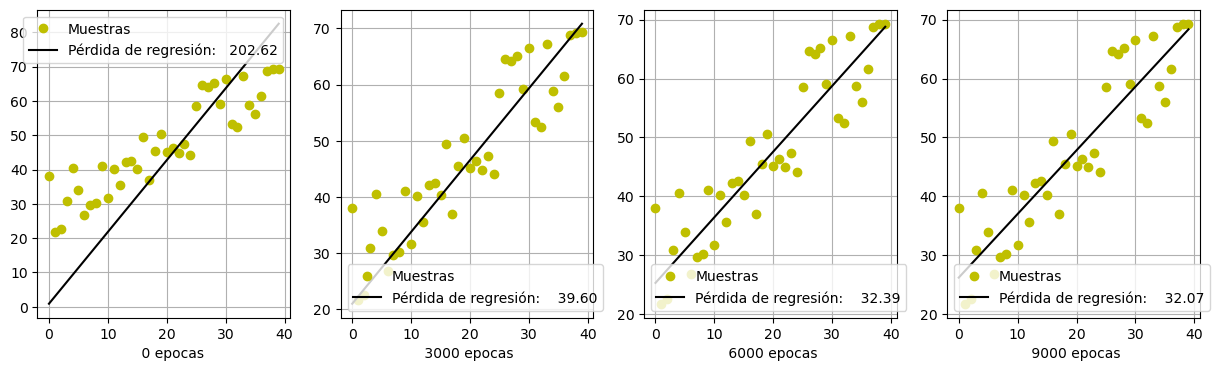

36.99395211743931
47.8079771318268


In [24]:
#Evolución de la regresión lineal
X, y = create_samples(40)
EPOCHS = 9001;
fig, axs = plt.subplots(1,4, figsize=(15,4))
b, w = model(X, y, 0.001, random.random(), random.random(), EPOCHS)
plt.show()

print(prediction(10, b, w))
print(prediction(20, b, w))

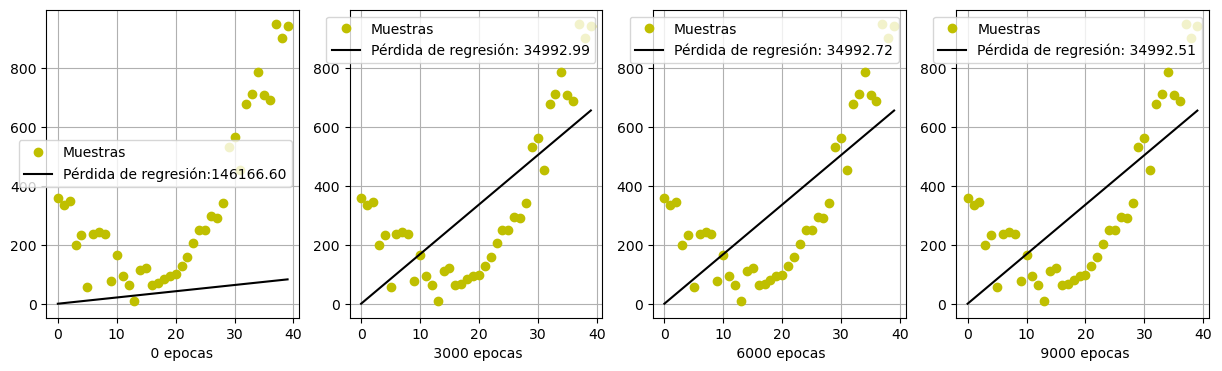

36.99395211743931
47.8079771318268


In [26]:
# regresión lineal usando un valor alpha incorrecto
fig, axs = plt.subplots(1,4, figsize=(15,4))
model(X, y, 0.0001, random.random(), random.random(), EPOCHS)   
y = []
for i in range(len(X)):
    y.append((X[i]-10)**2+random.random()*20*abs(len(X)/2-i))
plt.show()

print(prediction(10, b, w))
print(prediction(20, b, w))

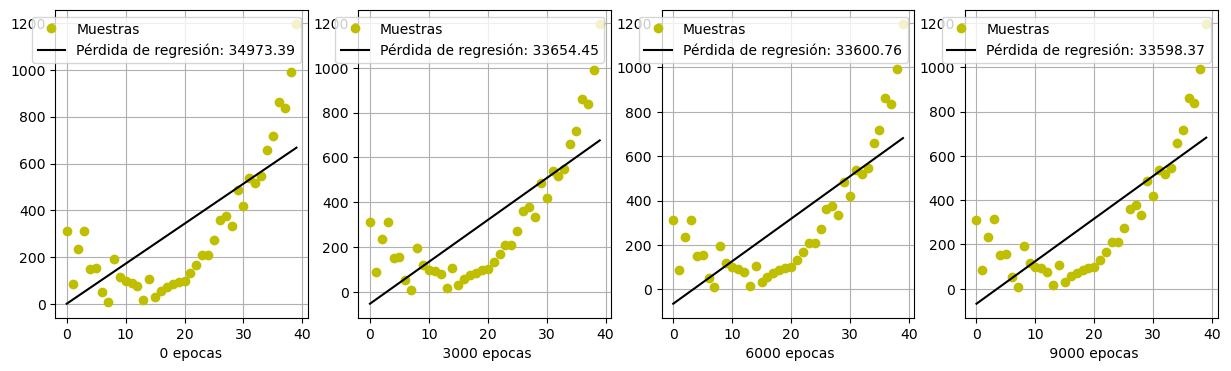

36.99395211743931
47.8079771318268


In [27]:
#no se puede clasificar con un enfoque lineal
fig, axs = plt.subplots(1,4, figsize=(15,4))
model(X, y, 0.001, random.random(), random.random(), EPOCHS)   

plt.show()

print(prediction(10, b, w))
print(prediction(20, b, w))
